In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#write code to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('Japan_life_expectancy.csv')
print("Dataset Shape:", df.shape)
print("First few rows of the dataset:")
#print(df.head(5))

Dataset Shape: (47, 23)
First few rows of the dataset:


In [29]:
df.columns

Index(['Prefecture', 'Life_expectancy', 'Physician', 'Junior_col',
       'University', 'Public_Hosp', 'Pshic_hosp', 'Beds_psic', 'Nurses',
       'Avg_hours', 'Salary', 'Elementary_school', 'Sport_fac', 'Park',
       'Forest', 'Income_per capita', 'Density_pop', 'Hospitals', 'Beds',
       'Ambulances', 'Health_exp', 'Educ_exp', 'Welfare_exp'],
      dtype='object')

In [30]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Life_expectancy   Physician  Junior_col  University  Public_Hosp  \
count        47.000000   47.000000   47.000000   47.000000    47.000000   
mean         84.525745  261.438298   13.627660   18.621277    21.263830   
std           0.503133   40.948842    1.243191    4.459818    10.393548   
min          82.800000  177.800000   11.300000   11.800000     7.400000   
25%          84.240000  230.400000   12.850000   15.750000    14.650000   
50%          84.540000  257.900000   13.500000   18.100000    19.200000   
75%          84.885000  290.950000   14.350000   20.600000    25.300000   
max          85.500000  338.400000   16.900000   31.600000    49.100000   

       Pshic_hosp   Beds_psic       Nurses   Avg_hours      Salary  ...  \
count   47.000000   47.000000    47.000000   47.000000   47.000000  ...   
mean     1.114894  317.861702  1121.568085  173.914894  290.817021  ...   
std      0.557548  119.613115   244.333898    1.482943   24.657670  ...   

In [31]:
print("\nData Types:")
print(df.dtypes)
numerical_cols = df.select_dtypes(include=np.number).columns


Data Types:
Prefecture            object
Life_expectancy      float64
Physician            float64
Junior_col           float64
University           float64
Public_Hosp          float64
Pshic_hosp           float64
Beds_psic            float64
Nurses               float64
Avg_hours            float64
Salary               float64
Elementary_school    float64
Sport_fac            float64
Park                 float64
Forest               float64
Income_per capita    float64
Density_pop          float64
Hospitals            float64
Beds                 float64
Ambulances           float64
Health_exp           float64
Educ_exp             float64
Welfare_exp          float64
dtype: object


In [32]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Prefecture           0
Life_expectancy      0
Physician            0
Junior_col           0
University           0
Public_Hosp          0
Pshic_hosp           0
Beds_psic            0
Nurses               0
Avg_hours            0
Salary               0
Elementary_school    0
Sport_fac            0
Park                 0
Forest               0
Income_per capita    0
Density_pop          0
Hospitals            0
Beds                 0
Ambulances           0
Health_exp           0
Educ_exp             0
Welfare_exp          0
dtype: int64


In [33]:
for col in numerical_cols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)
# Verify that there are no more missing values in numerical columns
print("\nMissing Values After Imputation:")
print(df[numerical_cols].isnull().sum())


Missing Values After Imputation:
Life_expectancy      0
Physician            0
Junior_col           0
University           0
Public_Hosp          0
Pshic_hosp           0
Beds_psic            0
Nurses               0
Avg_hours            0
Salary               0
Elementary_school    0
Sport_fac            0
Park                 0
Forest               0
Income_per capita    0
Density_pop          0
Hospitals            0
Beds                 0
Ambulances           0
Health_exp           0
Educ_exp             0
Welfare_exp          0
dtype: int64


In [34]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation = numeric_df.corr()
print(correlation)

                   Life_expectancy  Physician  Junior_col  University  \
Life_expectancy           1.000000   0.321545    0.569207    0.560164   
Physician                 0.321545   1.000000   -0.035781    0.085263   
Junior_col                0.569207  -0.035781    1.000000    0.493770   
University                0.560164   0.085263    0.493770    1.000000   
Public_Hosp              -0.091038  -0.222218   -0.236237   -0.424736   
Pshic_hosp               -0.240471   0.284066   -0.286641   -0.622081   
Beds_psic                -0.263259   0.412624   -0.315751   -0.649952   
Nurses                   -0.054996   0.634156   -0.168570   -0.552220   
Avg_hours                -0.111068   0.087101   -0.157295   -0.307384   
Salary                    0.406123   0.000284    0.346947    0.917426   
Elementary_school        -0.559066  -0.161057   -0.549658   -0.885628   
Sport_fac                -0.130514   0.011963   -0.067754   -0.701526   
Park                      0.333984  -0.142976    0.

In [35]:
def highlight_highly_correlated_pairs(correlation_matrix, threshold=0.8):
    high_corr_pairs = pd.DataFrame(columns=["Feature 1", "Feature 2", "Correlation"])
    for col1 in correlation_matrix.columns:
        for col2 in correlation_matrix.index:
            if col1 != col2:  # Avoid self-correlation
                corr = correlation_matrix.loc[col1, col2]
                if abs(corr) > threshold:
                    # Check if the pair (col1, col2) is already in the DataFrame (or col2,col1)
                    existing_pairs = [(row["Feature 1"], row["Feature 2"]) for _, row in high_corr_pairs.iterrows()]
                    if (col1, col2) not in existing_pairs and (col2, col1) not in existing_pairs:
                        new_row = pd.DataFrame({"Feature 1": [col1], "Feature 2": [col2], "Correlation": [corr]})
                        high_corr_pairs = pd.concat([high_corr_pairs, new_row], ignore_index=True)
    return high_corr_pairs
# Find highly correlated pairs
highly_correlated_pairs = highlight_highly_correlated_pairs(correlation, threshold=0.8)
# Display the result
print("Highly Correlated Pairs:")
print(highly_correlated_pairs)

Highly Correlated Pairs:
    Feature 1          Feature 2  Correlation
0  University             Salary     0.917426
1  University  Elementary_school    -0.885628
2  Pshic_hosp          Beds_psic     0.888039
3   Beds_psic             Nurses     0.901373
4   Beds_psic          Hospitals     0.828832
5   Beds_psic               Beds     0.826189
6      Nurses          Hospitals     0.895933
7      Nurses               Beds     0.927485
8      Salary  Elementary_school    -0.821875
9   Hospitals               Beds     0.920696


In [36]:
# Plot the heatmap
#plt.figure(figsize=(16, 8))
#sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Correlation Heatmap')
#plt.show()

In [37]:
mask = np.triu(np.ones_like(correlation, dtype=bool))
df_sorted = df.sort_values(by=['Prefecture'])
numeric_df_sorted = df_sorted.select_dtypes(include=[np.number])
correlation_sorted = numeric_df_sorted.corr()

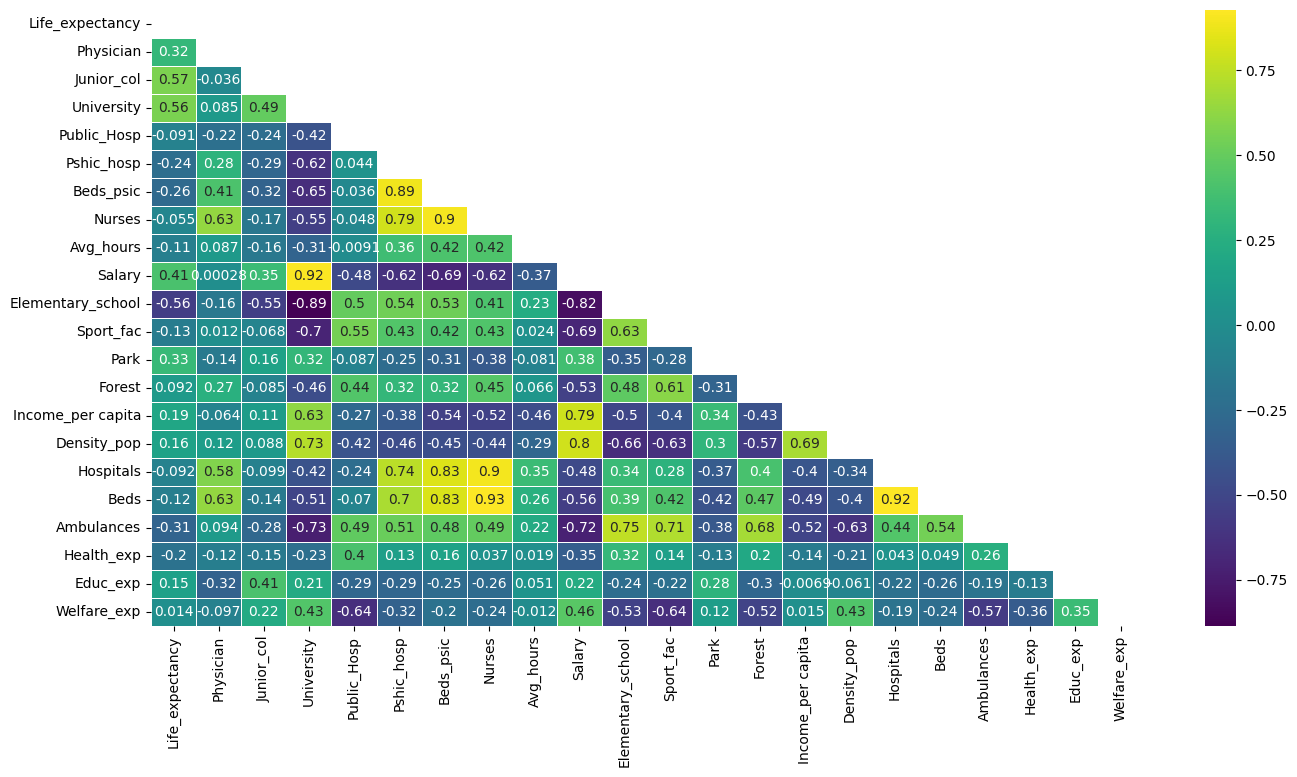

In [38]:
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', linewidths=0.5, mask=mask)
plt.show()

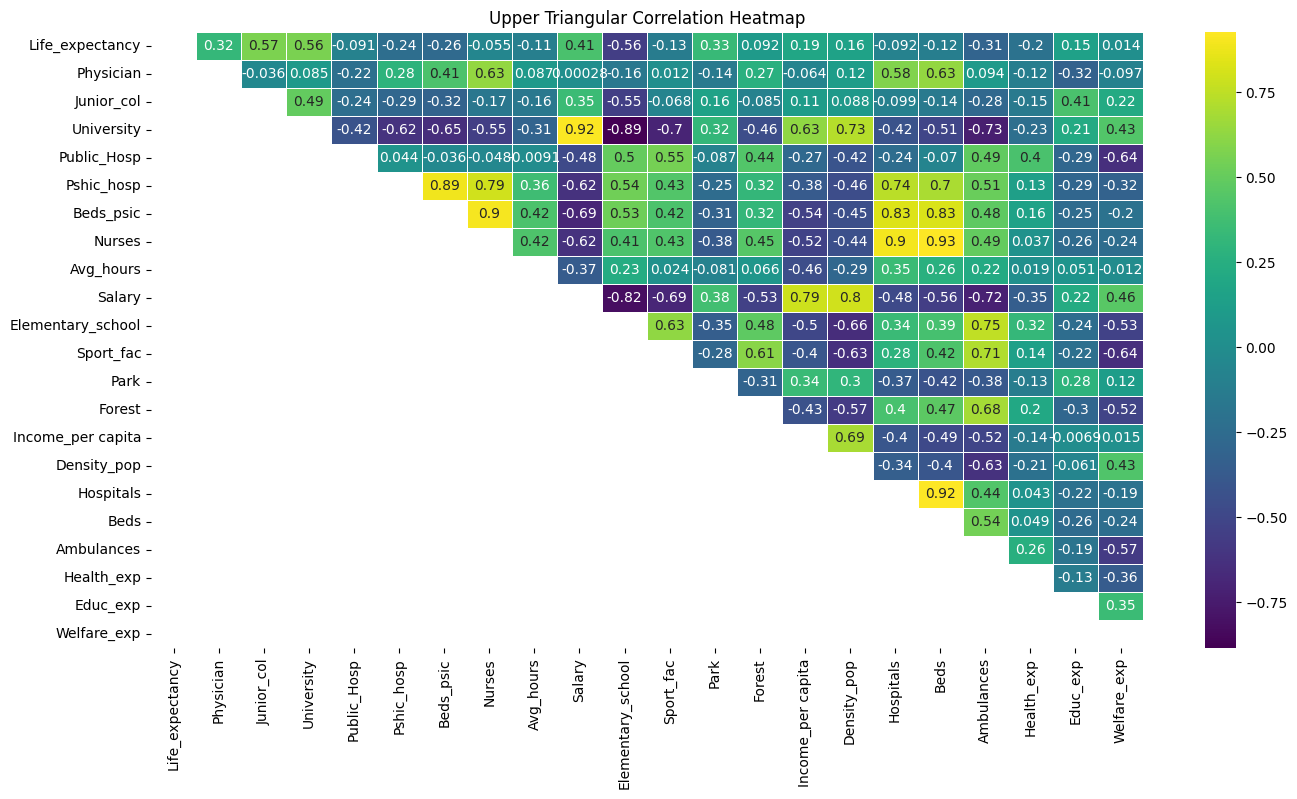

In [39]:
mask = np.tril(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
sns.heatmap(correlation, annot=True, cmap='viridis', linewidths=0.5, mask=mask)
plt.title('Upper Triangular Correlation Heatmap')
plt.show()

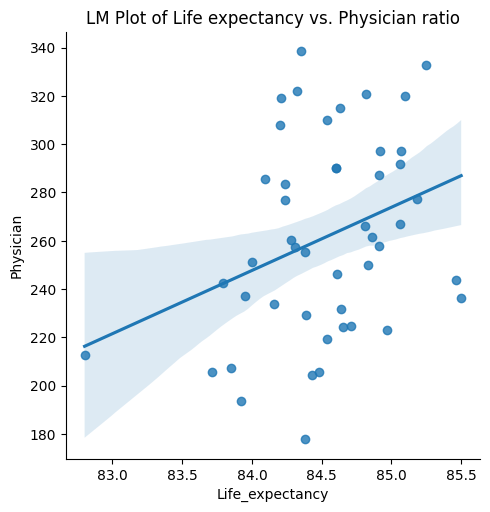

In [40]:
sns.lmplot(x='Life_expectancy', y='Physician', data=df)
plt.title('LM Plot of Life expectancy vs. Physician ratio')
plt.xlabel('Life_expectancy')
plt.ylabel('Physician')
plt.show()

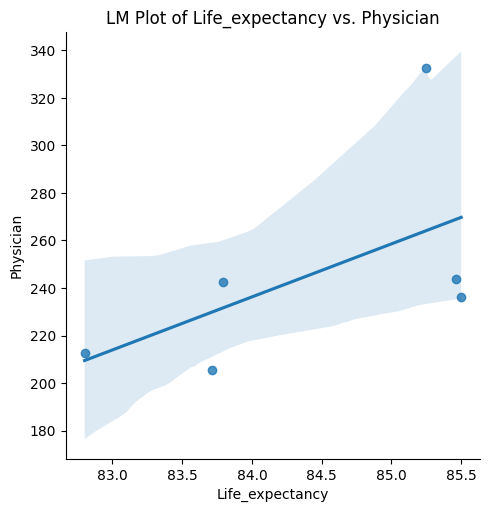

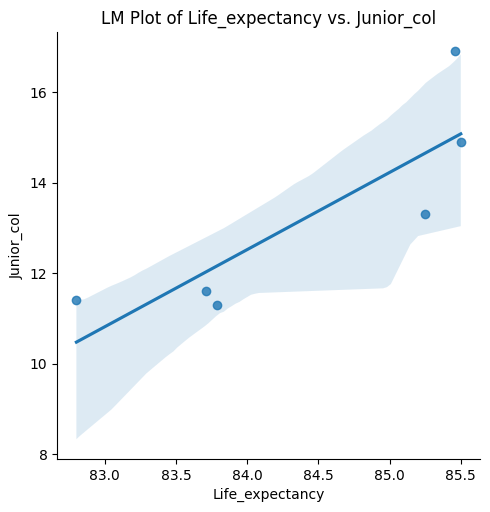

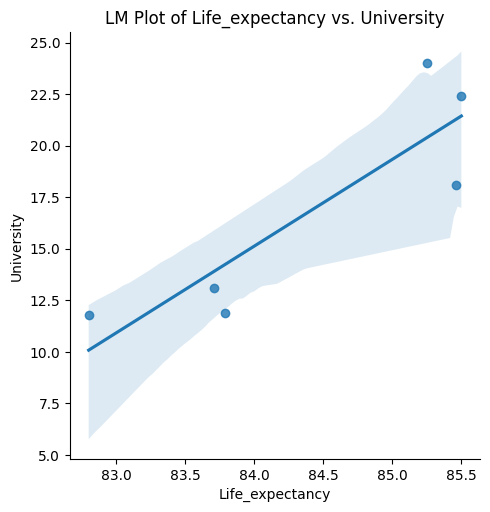

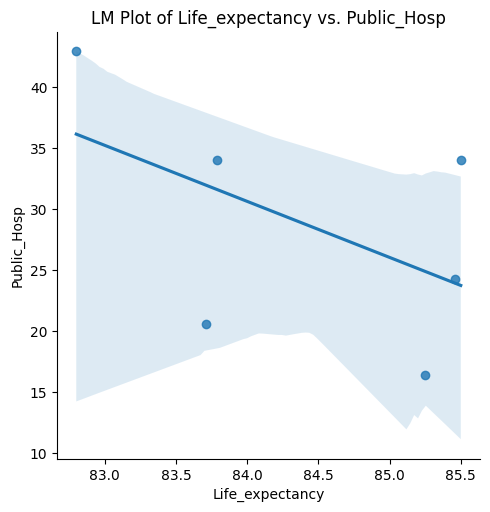

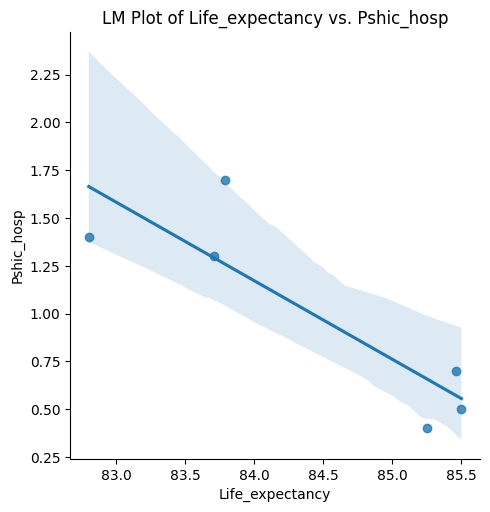

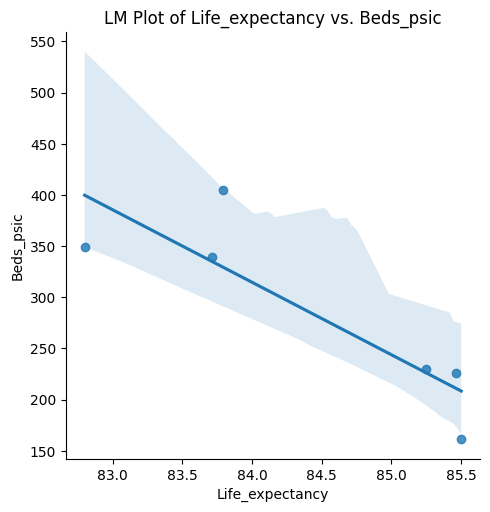

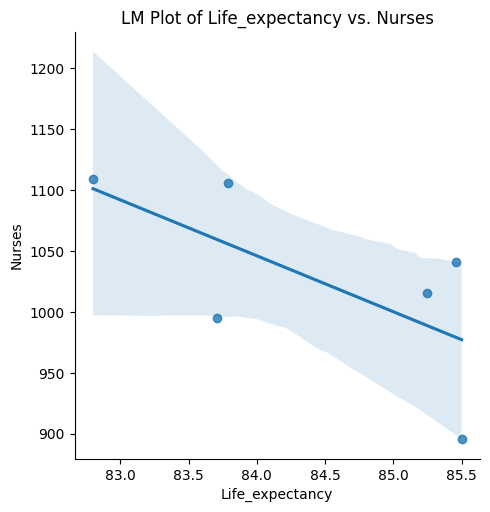

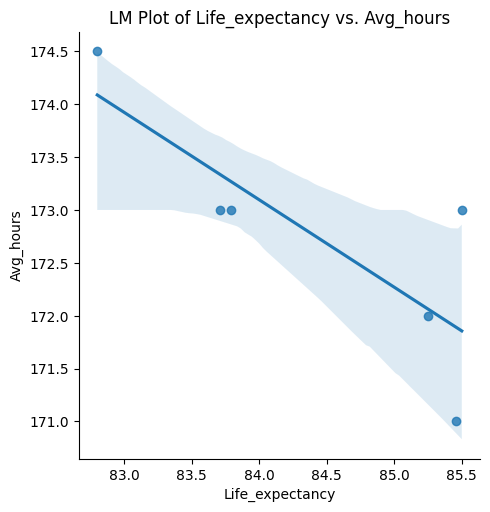

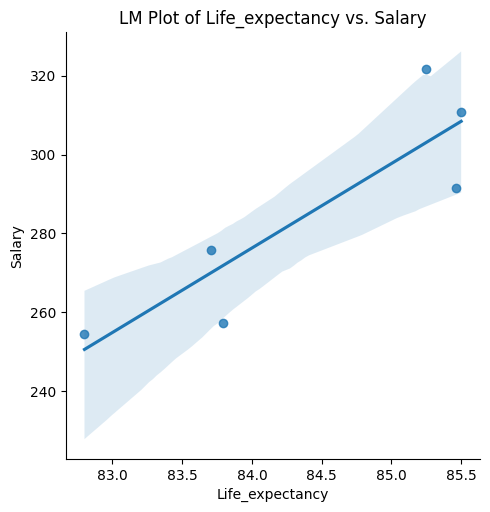

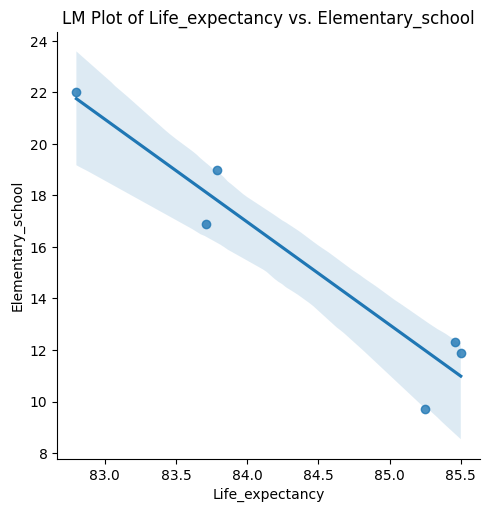

In [48]:
import itertools

df_sorted = df.sort_values(by=['Life_expectancy'])
top_3 = df_sorted.head(3)
bottom_3 = df_sorted.tail(3)
selected_data = pd.concat([top_3, bottom_3])
numerical_cols = selected_data.select_dtypes(include=np.number).columns

# Generate all possible combinations of numerical columns
all_combinations = list(itertools.combinations(numerical_cols, 2))

# Select only the first 10 combinations
selected_combinations = all_combinations[:10]

# Create lmplots for the selected combinations
for col1, col2 in selected_combinations:
    sns.lmplot(x=col1, y=col2, data=selected_data)
    plt.title(f'LM Plot of {col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Summary of Factors Contributing to Japan's High Life Expectancy Healthcare Infrastructure

More physicians correlate with higher life expectancy.
Advanced medical technology ensures better diagnosis and treatment.
Universal healthcare provides accessible and preventive care.
Lifestyle and Diet

A traditional diet rich in vegetables, fish, and fermented foods promotes health.
An active lifestyle contributes to cardiovascular health.
Low obesity rates reduce chronic disease risks.
Social and Environmental Factors

Strong social support enhances mental well-being.
Low crime rates reduce stress and improve quality of life.
A clean environment minimizes exposure to pollutants.
Public Health Policies

Emphasis on preventive healthcare ensures early disease detection.
Government health programs promote healthy lifestyles.
Investments in public health infrastructure maintain high-quality services.
Conclusion
These interconnected factors collectively contribute to Japan's high life expectancy. Further research can refine the understanding of their relative importance.